<a href="https://colab.research.google.com/github/Denis04-M/heart-faiure-analysis/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# loading data to colab

from google.colab import files
uploaded = files.upload()

In [ ]:
# reading the data
import io
import pandas as pd

df2 = pd.read_csv(io.BytesIO(uploaded['heart_failure_clinical_records_dataset.csv']))

In [ ]:
# exploring the data

heart_records = pd.read_csv('heart_failure_clinical_records_dataset.csv')
heart_records.head(7)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1


In [ ]:
# exploring the data
heart_records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
# exploring the data

heart_records.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [ ]:
# exploring the data
# looking for null inuts

heart_records.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

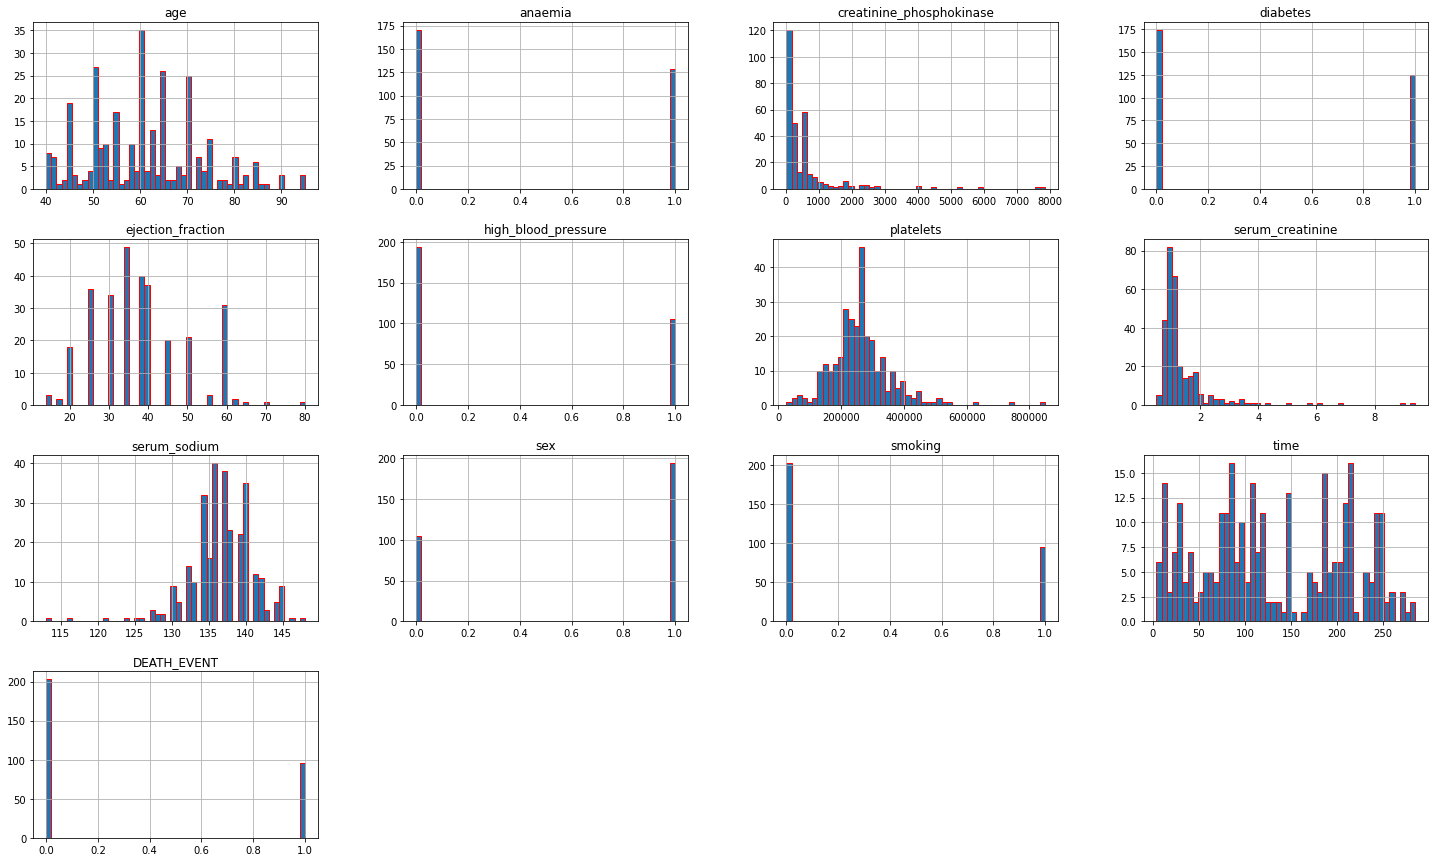

In [ ]:
# ploting the data

import matplotlib.pyplot as plt
import seaborn as sns

heart_records.hist(bins=50, figsize=(25,15), edgecolor='red')
plt.show()

Text(0.5, 1.0, 'the % of deaths')

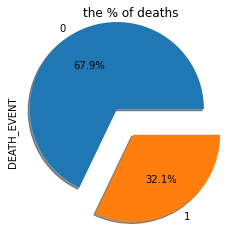

In [ ]:
# perentage of death event visualisation

heart_records.DEATH_EVENT.value_counts().plot.pie(explode=[0.3,0.05],autopct='%1.1f%%',shadow=True)
plt.title('the % of deaths')

In [ ]:
# Distribution of Age
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = heart_records['age'],
    xbins=dict( # bins used for histogram
        start=40,
        end=95,
        size=2
    ),
    marker_color='blue',
    opacity=1
))

fig.update_layout(
    title_text='Distribution of Age',
    xaxis_title_text='AGE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'presentation'
)

fig.show()


In [ ]:
# distribution of death over age

import plotly.express as px

graph = px.histogram(heart_records, x ='age', color = 'DEATH_EVENT', marginal='violin',
                     hover_data = heart_records.columns, title='Distribution of DEATH_EVENT OVER AGE',
                     labels={'age':'AGE'}, template='plotly',)

graph.show()

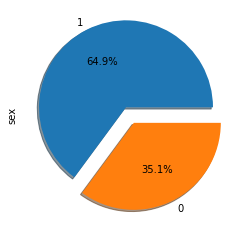

In [ ]:
# distribution of gender

heart_records.sex.value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)

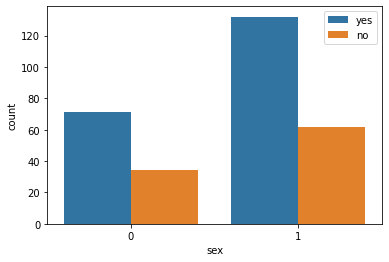

In [ ]:
# gender death events

sns.countplot(x='sex', hue='DEATH_EVENT', data = heart_records)
plt.legend(['yes', 'no'])

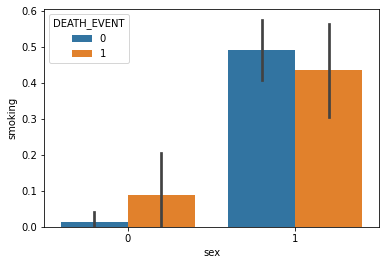

In [ ]:
# smoking and gender vs death events

sns.barplot(x='sex',y='smoking',hue='DEATH_EVENT',data=heart_records);

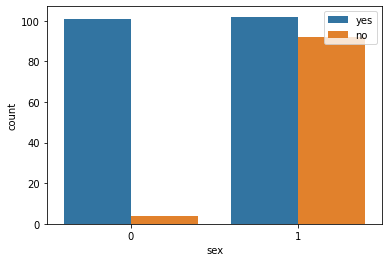

In [ ]:
# smoking vs gender events
sns.countplot(x='sex', hue='smoking', data=heart_records)
plt.legend(['yes','no'])

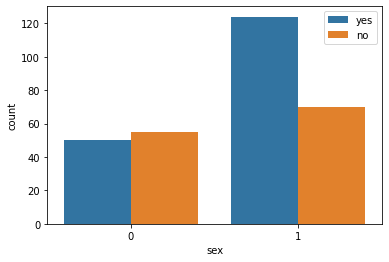

In [ ]:
# diabetes vs gender

sns.countplot(x='sex',hue='diabetes',data=heart_records)
plt.legend(['yes','no'])

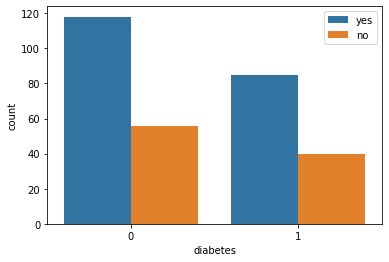

In [ ]:
# diabetes and gender vs death events
sns.countplot(x='diabetes',hue='DEATH_EVENT',data=heart_records)
plt.legend(['yes','no']);

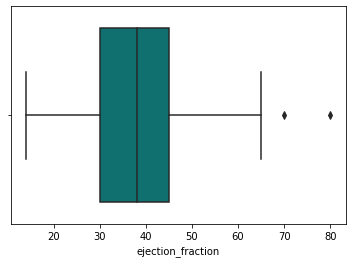

In [ ]:
# ejection_fraction distribution

sns.boxplot(x = heart_records.ejection_fraction, color = 'teal')
plt.show()

In [ ]:
# removing outliers in the ejection_fraction column

heart_records = heart_records[heart_records['ejection_fraction']<70]

In [ ]:
# ejection_fraction distribution

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = heart_records['ejection_fraction'],
    xbins=dict( # bins used for histogram
        start=14,
        end=80,
        size=2
    ),
    marker_color='teal',
    opacity=1
))

fig.update_layout(
    title_text='EJECTION FRACTION DISTRIBUTION',
    xaxis_title_text='EJECTION FRACTION',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates

    template = 'plotly_dark'
)

fig.show()


In [ ]:
# Distribution of platelets

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = heart_records['platelets'],
    xbins=dict( # bins used for histogram
        start=25000,
        end=300000,
        size=5000
    ),
    marker_color='#50BFE6',
    opacity=1
))

fig.update_layout(
    title_text='PLATELETS DISTRIBUTION',
    xaxis_title_text='PLATELETS',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()


In [ ]:
# Distribution of PLATELETS Vs DEATH_EVENT

fig = px.histogram(heart_records, x='platelets', color='DEATH_EVENT', marginal='violin', hover_data=heart_records.columns,
                   title ='Distribution of PLATELETS Vs DEATH_EVENT', 
                   labels={'platelets': 'PLATELETS'},
                   template='plotly_dark',
                   color_discrete_map={'0': 'RebeccaPurple', '1': 'MediumPurple'})
fig.show()

In [ ]:
fig = px.histogram(heart_records, x='ejection_fraction', color='DEATH_EVENT', marginal='violin', hover_data=heart_records.columns,
                   title ='Distribution of EJECTION FRACTION Vs DEATH_EVENT', 
                   labels={'ejection_fraction': 'EJECTION FRACTION'},
                   template='plotly_dark',
                   color_discrete_map={'0': 'RebeccaPurple', '1': '#a83260'})
fig.show()

In [ ]:
# Distribution of serum_creatinine

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = heart_records['serum_creatinine'],
    xbins=dict( # bins used for histogram
        start=0.5,
        end=9.4,
        size=0.2
    ),
    marker_color='#E77200',
    opacity=1
))

fig.update_layout(
    title_text='SERUM CREATININE DISTRIBUTION',
    xaxis_title_text='SERUM CREATININE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()


In [ ]:
# Distribution of serum_creatinine by DEATH_EVENT
fig = px.histogram(heart_records, x='serum_creatinine', color='DEATH_EVENT', marginal='violin', hover_data=heart_records.columns,
                   title ='Distribution of SERUM CREATININE Vs DEATH_EVENT', 
                   labels={'serum_creatinine': 'SERUM CREATININE'},
                   template='plotly_dark',
                   color_discrete_map={'0': 'RebeccaPurple', '1': 'MediumPurple'})
fig.show()

In [ ]:
# Distribution of serum_sodium


fig = go.Figure()
fig.add_trace(go.Histogram(
    x = heart_records['serum_sodium'],
    xbins=dict( # bins used for histogram
        start=113,
        end=148,
        size=1
    ),
    marker_color='#AAF0D1',
    opacity=1
))

fig.update_layout(
    title_text='SERUM SODIUM DISTRIBUTION',
    xaxis_title_text='SERUM SODIUM',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [ ]:
# Now lets categorize the above histogram by DEATH_EVENT

fig = px.histogram(heart_records, x='serum_sodium', color='DEATH_EVENT', marginal='violin',hover_data=heart_records.columns,
                   title ='Distribution of SERUM SODIUM Vs DEATH_EVENT', 
                   labels={'serum_sodium': 'SERUM SODIUM'},
                   template='plotly_dark',
                   color_discrete_map={'0': 'RebeccaPurple', '1': 'MediumPurple'})
fig.show()

In [ ]:
# 'Distribution of AGE Vs DIABETES'

fig = px.histogram(heart_records, x='age', color='diabetes', marginal='violin',hover_data=heart_records.columns,
                   title ='Distribution of AGE Vs DIABETES', 
                   labels={'diabetes': 'DIABETES', 'age': 'AGE'},
                   template='plotly_dark',
                   color_discrete_map={'0': 'RebeccaPurple', '1': 'MediumPurple'})
fig.show()

In [ ]:
# 'Distribution of AGE Vs ANAEMIA'

fig = px.histogram(heart_records, x='age', color='anaemia', marginal='violin',hover_data=heart_records.columns,
                   title ='Distribution of AGE Vs ANAEMIA', 
                   labels={'anaemia': 'ANAEMIA', 'age': 'AGE'},
                   template='plotly_dark',
                   color_discrete_map={'0': 'RebeccaPurple', '1': 'MediumPurple'})
fig.show()

In [ ]:
# 'Distribution of AGE Vs HIGH BLOOD PRESSURE'

fig = px.histogram(heart_records, x='age', color='high_blood_pressure', marginal='violin',hover_data=heart_records.columns,
                   title ='Distribution of AGE Vs HIGH BLOOD PRESSURE', 
                   labels={'high_blood_pressure': 'HIGH BLOOD PRESSURE', 'age': 'AGE'},
                   template='plotly_dark',
                   color_discrete_map={'0': 'RebeccaPurple', '1': 'MediumPurple'})
fig.show()

In [ ]:
# 'Distribution of AGE Vs SMOKING'
fig = px.histogram(heart_records, x='age', color='smoking', marginal='violin',hover_data=heart_records.columns,
                   title ='Distribution of AGE Vs SMOKING', 
                   labels={'smoking': 'SMOKING', 'age': 'AGE'},
                   template='plotly_dark',
                   color_discrete_map={'0': 'RebeccaPurple', '1': 'MediumPurple'})
fig.show()


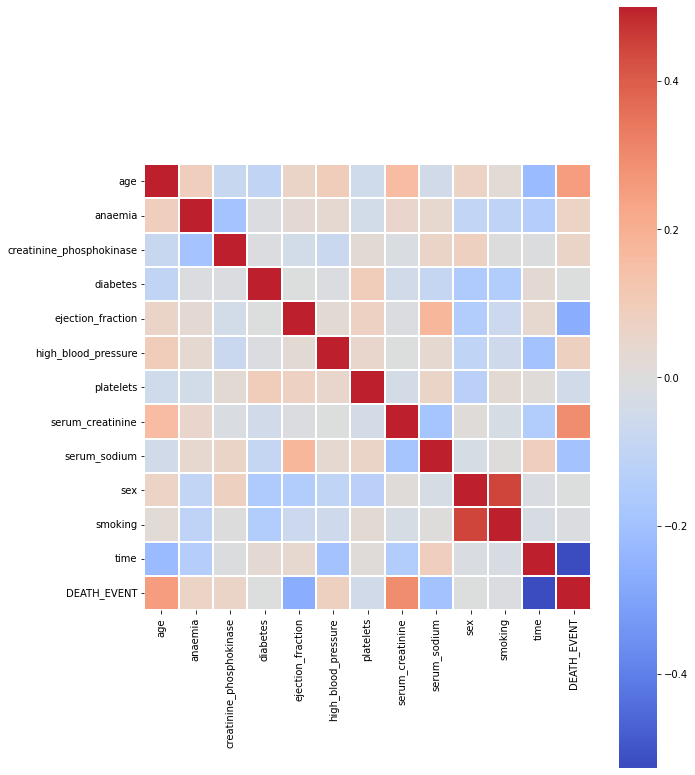

In [ ]:
# correlations between all features
corr = heart_records.corr()
plt.figure(figsize=(8, 14))
sns.heatmap(corr, vmax=0.5, center=0, square=True, linewidths=1, cmap='coolwarm')
plt.show()

In [ ]:
# correlations between death event

corr['DEATH_EVENT'].sort_values(ascending = False)

DEATH_EVENT                 1.000000
serum_creatinine            0.286439
age                         0.255490
high_blood_pressure         0.071639
creatinine_phosphokinase    0.063787
anaemia                     0.059143
diabetes                    0.000246
sex                        -0.000817
smoking                    -0.010913
platelets                  -0.043820
serum_sodium               -0.196280
ejection_fraction          -0.284516
time                       -0.536734
Name: DEATH_EVENT, dtype: float64

[0.09606725 0.02660987 0.07567212 0.02906653 0.12721858 0.02424625
 0.07161389 0.11759627 0.08715217 0.02547198 0.02919756 0.29008753]


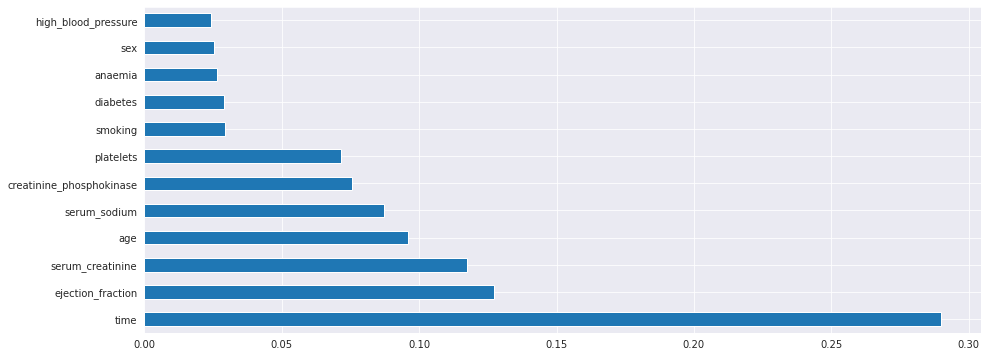

In [ ]:
# feature selection

plt.rcParams['figure.figsize']=15,6 
sns.set_style('darkgrid')

x = heart_records.iloc[:, :-1]
y = heart_records.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [ ]:
# dropping features with low correlation

heart_records = heart_records.drop(['anaemia','creatinine_phosphokinase','diabetes','high_blood_pressure','platelets','sex','smoking','age'],axis=1)

In [ ]:
heart_records.corr().style.background_gradient(cmap='coolwarm').set_precision(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
ejection_fraction,1.000,-0.087,0.180,0.046,-0.285
serum_creatinine,-0.087,1.000,-0.211,-0.189,0.286
serum_sodium,0.180,-0.211,1.000,0.088,-0.196
time,0.046,-0.189,0.088,1.000,-0.537
DEATH_EVENT,-0.285,0.286,-0.196,-0.537,1.000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

# removing the target from the train/test data

x=heart_records.drop('DEATH_EVENT',axis=1)
y=heart_records.DEATH_EVENT

In [ ]:
# splilting training and testing data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
# scaling the feature

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
# creating and training a model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score


# Regression model
model = LogisticRegression()

#training the model
model.fit(x_train, y_train)

# testing the model
y_pred = model.predict(x_test)

In [ ]:
mylist = []
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# accuracy score
acc_test = accuracy_score(y_test, y_pred)

mylist.append(acc_test)
print(cm)
print(acc_test)

[[58  3]
 [ 8 21]]
0.8777777777777778


In [ ]:
# SVM model

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []

classifier = SVC(C = 0.7, random_state=0, kernel = 'rbf')
classifier.fit(x_train, y_train)

SVC(C=0.7, random_state=0)

In [ ]:
# Predicting the test set results

y_pred = classifier.predict(x_test)
print(y_pred)

[0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [ ]:
# testing the accuracy of SVM model

cm = confusion_matrix(y_test, y_pred)
acc_svc = accuracy_score(y_test, y_pred)
print(cm)
print(acc_svc)
mylist.append(acc_svc)

[[58  3]
 [11 18]]
0.8444444444444444


In [ ]:
# ANN model

import tensorflow as tf

# np.random.seed(0)

ann = tf.keras.models.Sequential()

# adding four hidden layers
for i in range(4):
  ann.add(tf.keras.layers.Dense(units=7, activation='relu'))

# adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )

# Training the ANN on the training set
ann.fit(x_train, y_train, batch_size = 16, epochs = 100)

Epoch 1/100
14/14 [==============================] - 1s 2ms/step - loss: 0.6859 - accuracy: 0.5933
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6653 - accuracy: 0.6794
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6468 - accuracy: 0.6794
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6332 - accuracy: 0.6794
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6182 - accuracy: 0.6794
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.6039 - accuracy: 0.6794
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5924 - accuracy: 0.6794
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5802 - accuracy: 0.6794
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.6794
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.5588 - accuracy: 0.6794
Epoch 11/

In [ ]:
# ANN model accuracy

ac_ann = accuracy_score(y_test,y_pred)
print("Accuracy")
print(ac_ann)
mylist.append(ac_ann)

Accuracy
0.8444444444444444
